# Introduction to Pandas: Using Python to explore reprintings of "The Raven" & a dataset of your choice

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yw7Bp8MKK12KtAbqb6KaRwOUu3Xvzbhg?usp=sharing)

Last week, we started to build on our introduction to Python by learning how to manipulate, clean, sort and analyze data in ordered lists. We also practiced working with a Python script for counting word frequencies in a text file, that we loaded in from our corpus. 

Often, though, the dataset that we want to work with, or explore take a slightly different form. We could read in a  SPREADSHEET as a plain text file, but that's not the most useful way to work with this kind of structured data.

Today we're going to learn how to use Python to read and explore tabular data. We'll learn some command for analyzing different kinds of values stored in tabular data (numeric and "string" data), practice a technique called exploratory data analysis, slice up our dataset into meaningful subsets, make simple data visualizations, and work with missing data.

We're going to be working with two datasets today: the dataset of [early reprintings of Edgar Allan Poe's "The Raven" (1845)](https://github.com/sceckert/Data-and-Culture-Fall-2024/blob/main/_week5/poe-the-raven-reprintings.csv) (for a refresher on where this data came from, see our [in-class exercise](https://github.com/sceckert/Data-and-Culture-Fall-2024/blob/main/_week5/in-class-exercise.md).


We're also going to practice working with**a literary dataset of your choice**!

- [1. What is Pandas?](#1.-What-is-Pandas?)
    - [Using Pandas to clean tabular data](#Using-Pandas-to-clean-tabular-data)
    - [Cheatsheet: Operations we can peform on DataFrames](#Pandas-Cheat-Sheet)
    - [Using Pandas to analyze data](#Using-Pandas-to-analyze-data)
    - [**Exercise 1**: Finding out more about our dataset](#Exercise-1:-Finding-out-more-about-our-dataset) 
- [2: Make a simple data visualization](#2:-Make-a-simple-data-visualization) 
- [**Exercise 2**: Working with your own dataset](#Exercise-3:-Working-with-your-own-dataset)


## 1. What is Pandas?

We had a very quick preview of this last week. **`Pandas`** is a powerful Python library for working with tabular data. 

- `pandas` will read in tabular data––ie, a spreadsheet in the form of a .CSV, .TSV file. (Remember, CSV is short for comma-separarated values, a format for storing tabular data) This library can also work with data in slightly more complicated formats, like .JSON files.
- `pandas` helps you explore, filter, and analyze data.


When you read in a file, `pandas` creates a **DataFrame** -- this is a special Python datatype that we can perform perations on. Think of a a dataframe as a souped-up spreadsheet: it stores values in an "array" (a term for an arrangement of data in an ordered sequence that makes it easy to retrieve particular values,like all the values for the 5th row of a spreadsheet).


![image](../_images/pusheen-computer.jpg)

For instance, let's look back at the [Poe "The Raven" reprintings dataset from Monday](https://github.com/sceckert/Data-and-Culture-Fall-2024/blob/main/_datasets/literature/poe-the-raven-reprintings.csv). We know that we can download this data in the form of a CSV file. What would we have to do to load in?

### Import `pandas`
Because `pandas` is an external library of scripts, we're going to have to import it.

In [5]:
# Import Pandas library, nicknaming it "pd"
import pandas as pd # Here the "as pd" gives it the nickname pd
# Set the maximum number of rows to display
pd.options.display.max_rows = 100

### Read in our CSV (and a note about encodings)
Here, we're going to read in a CSV spreadsheet of "The Raven" reprintings data using pandas (which we've nicknamed `pd`) and the `.read_csv()` operation and assign it to the variable `raven_reprintings_df` (so we can remind ourselves that this is the our Poe "The Raven" reprintings dataframe).

Let's try and read in our CSV *without* specifying the encoding and see what happns:

In [8]:
# Let's load in our CSV file as a DataFrame and assign it to a variable called `raven_reprintings_df`
raven_reprintings_df = pd.read_csv('../_datasets/literature/poe-the-raven-reprintings.csv', parse_dates=['Date'])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 1136: invalid continuation byte

What happened? Let's interpret our error: we're getting a `UnicodeDecode error. This is because our data isn't encoded in UTF-8, but in an older encoding format, ISO 8859.

Let's try telling `pandas` that this data is not encoded in UTF-8

In [26]:
# Let's load in our CSV file as a DataFrame and assign it to a variable called `raven_reprintings_df`
# Here, the `encoding="ISO-8859-1"` parameter tells us that our data is not encodedin Unicode (UTF-8), which is the default.
raven_reprintings_df = pd.read_csv('../_datasets/literature/poe-the-raven-reprintings.csv', encoding="ISO-8859-1", parse_dates=['Date'])

### Display our DataFrame
Like other Python variables, we can simply type the name of our DataFrame to get a peek at what it contains

In [29]:
raven_reprintings_df

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Location,Links,lat,lon,Coordinates
0,The Raven,1845-01-29,exact,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
1,The Raven,1845-02-01,exact,American Review,The American Review was printed under the titl...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
2,The Raven,1845-02-03,exact,New York Morning News,Â (Apparently reprinted from the Evening Mirr...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
3,The Raven,1845-02-04,exact,New-York Daily Tribune,This printing is noted as ÒFrom the American R...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",https://chroniclingamerica.loc.gov/lccn/sn8303...,40.712728,-74.006015,"40.7127281, -74.0060152"
4,The Raven,1845-02-04,exact,Pittsburgh Daily Post,"(Pittsburgh, PA), vol. III, no. 127, p. 1, col...",https://www.eapoe.org/works/info/pp073.htm,Newspaper,"Pittsburgh, PA",NaN,40.441694,-79.990086,"40.4416941, -79.9900861"
...,...,...,...,...,...,...,...,...,...,...,...,...
123,The Raven,1884-01-01,approximate to the year,The Raven,", illustrated by W. L. Taylor. New York: E. P....",https://exhibits.library.jhu.edu/exhibits/show...,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
124,The Raven,1884-01-01,approximate to the year,The Raven,llustrated by Gustave Dore. New York: Harper &...,https://exhibits.library.jhu.edu/exhibits/show...,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
125,The Raven,1890-01-01,approximate to the year,Fort Worth Daily Gazette,NaN,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"Fort Worth, TX",https://chroniclingamerica.loc.gov/lccn/sn8606...,33.035748,-97.324625,"33.0357485, -97.3246250376905"
126,The Raven,1895-01-01,approximate to the year,"The Works of Edgar Allan Poe, vol. 10: Poems",", ed. E. C. Stedman and G. E. Woodberry (Chica...",https://www.eapoe.org/works/info/pp073.htm,Book,"Chicago, IL",NaN,41.881832,-87.623177,"\t41.881832, -87.623177"


Display just the first 5 rows:

In [32]:
raven_reprintings_df.head(5)

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Location,Links,lat,lon,Coordinates
0,The Raven,1845-01-29,exact,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
1,The Raven,1845-02-01,exact,American Review,The American Review was printed under the titl...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
2,The Raven,1845-02-03,exact,New York Morning News,Â (Apparently reprinted from the Evening Mirr...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
3,The Raven,1845-02-04,exact,New-York Daily Tribune,This printing is noted as ÒFrom the American R...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",https://chroniclingamerica.loc.gov/lccn/sn8303...,40.712728,-74.006015,"40.7127281, -74.0060152"
4,The Raven,1845-02-04,exact,Pittsburgh Daily Post,"(Pittsburgh, PA), vol. III, no. 127, p. 1, col...",https://www.eapoe.org/works/info/pp073.htm,Newspaper,"Pittsburgh, PA",NaN,40.441694,-79.990086,"40.4416941, -79.9900861"


## Using Pandas to read and sort tabular data

### Calculate summary statistics of the DataFrame
We can calculate some statistics on a DataFrame. This is a little like calculating summary statistics in Microsoft Excel or GoogleSheets 

In [ ]:
raven_reprintings_df.info()

In [ ]:
# Basic descriptive statistics
print("Basic information about the shape of our dataset:")
print(f"The number of columns in our dataset is: {raven_reprintings_df.shape[1]}")
print(f"The number of rows in our dataset is: {raven_reprintings_df.shape[0]}")

In [ ]:
# Calculate the maximum value in the "Date" column
print('The  maximum value in the "Date" column:')
raven_reprintings_df['Date'].max()

In [ ]:
# Calculate the minimum value in the "Date" column
print('The  minimum value in the "Date" column:')
raven_reprintings_df['Date'].min()

In [ ]:
# Calculate the number of unique values in the "Location" column
print('The number of unique values in the "Location" column:')
raven_reprintings_df['Location'].nunique()

### Select columns
To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets `[]`and a column name in quotations marks.

In [41]:
# Select only the column labeled "Location"
raven_reprintings_df['Location']

0        New York, NY
1        New York, NY
2        New York, NY
3        New York, NY
4      Pittsburgh, PA
            ...      
123      New York, NY
124      New York, NY
125    Fort Worth, TX
126       Chicago, IL
127        Boston, MA
Name: Location, Length: 128, dtype: object

To select multiple columns, we need to treat them like a dataframe, and enclose them in TWO sets of square brackets `[[ ]]`. 

In [44]:
raven_reprintings_df[['Publication_Title', 'Type', 'Location', 'Date']]

,Publication_Title,Type,Location,Date
0,Evening Mirror,Newspaper,"New York, NY",1845-01-29
1,American Review,Magazine,"New York, NY",1845-02-01
2,New York Morning News,Newspaper,"New York, NY",1845-02-03
3,New-York Daily Tribune,Newspaper,"New York, NY",1845-02-04
4,Pittsburgh Daily Post,Newspaper,"Pittsburgh, PA",1845-02-04
...,...,...,...,...
123,The Raven,Book,"New York, NY",1884-01-01
124,The Raven,Book,"New York, NY",1884-01-01
125,Fort Worth Daily Gazette,Newspaper,"Fort Worth, TX",1890-01-01
126,"The Works of Edgar Allan Poe, vol. 10: Poems",Book,"Chicago, IL",1895-01-01


### Count Values
To count values, we select a column, and use the `.value_counts()` operator

In [47]:
raven_reprintings_df['Location'].value_counts()

Location
New York, NY           22
Philadelphia, PA        9
London, UK              7
Boston, MA              6
Richmond, VA            6
Bloomington, IL         2
Charleston, SC          2
New Orleans, LA         2
Pittsburgh, PA          2
Baltimore, MD           2
Hartford, CT            2
Mobile, AL              2
Buffalo, NY             2
Alexandria, VA          2
Little Rock, AR         2
Ogdensburgh, NY         1
Shasta, CA              1
Lewisburg, PA           1
Maryland                1
Richmond, IN            1
Glasgow, Scotland       1
Pomeroy, OH             1
Blomfield, PA           1
Freeport, IL            1
Cincinnati, OH          1
Atchison, KS            1
Council Bluffs, IA      1
New Haven, CT           1
Placerville, CA         1
Virginia City, MT       1
Waynesburg, PA          1
Chambersburg, PA        1
Weston, WV              1
Tunkhannock, PA         1
Smyrna, Del             1
Bellows Falls, VT       1
Edinburgh, Scotland     1
Opelika, AL             1
Tro

To count only the top 15 locations, use brackets to slice:

In [50]:
raven_reprintings_df['Location'].value_counts()[:15]

Location
New York, NY        22
Philadelphia, PA     9
London, UK           7
Boston, MA           6
Richmond, VA         6
Bloomington, IL      2
Charleston, SC       2
New Orleans, LA      2
Pittsburgh, PA       2
Baltimore, MD        2
Hartford, CT         2
Mobile, AL           2
Buffalo, NY          2
Alexandria, VA       2
Little Rock, AR      2
Name: count, dtype: int64

## Using Pandas to clean tabular data

### Rename columns

Since so many of you brought this up in your homework, I thought we could try to rename some of the columns in our dataframe so that the variables better reflect the context.
To rename columns in a dataframe, we use the `.rename()` method and the `columns=` parameter.

Let's rename the "Location" column to "Publication_Location"

In [53]:
raven_reprintings_df.rename(columns={'Location': 'Publication_Location'})

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates
0,The Raven,1845-01-29,exact,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
1,The Raven,1845-02-01,exact,American Review,The American Review was printed under the titl...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
2,The Raven,1845-02-03,exact,New York Morning News,Â (Apparently reprinted from the Evening Mirr...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
3,The Raven,1845-02-04,exact,New-York Daily Tribune,This printing is noted as ÒFrom the American R...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",https://chroniclingamerica.loc.gov/lccn/sn8303...,40.712728,-74.006015,"40.7127281, -74.0060152"
4,The Raven,1845-02-04,exact,Pittsburgh Daily Post,"(Pittsburgh, PA), vol. III, no. 127, p. 1, col...",https://www.eapoe.org/works/info/pp073.htm,Newspaper,"Pittsburgh, PA",NaN,40.441694,-79.990086,"40.4416941, -79.9900861"
...,...,...,...,...,...,...,...,...,...,...,...,...
123,The Raven,1884-01-01,approximate to the year,The Raven,", illustrated by W. L. Taylor. New York: E. P....",https://exhibits.library.jhu.edu/exhibits/show...,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
124,The Raven,1884-01-01,approximate to the year,The Raven,llustrated by Gustave Dore. New York: Harper &...,https://exhibits.library.jhu.edu/exhibits/show...,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"
125,The Raven,1890-01-01,approximate to the year,Fort Worth Daily Gazette,NaN,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"Fort Worth, TX",https://chroniclingamerica.loc.gov/lccn/sn8606...,33.035748,-97.324625,"33.0357485, -97.3246250376905"
126,The Raven,1895-01-01,approximate to the year,"The Works of Edgar Allan Poe, vol. 10: Poems",", ed. E. C. Stedman and G. E. Woodberry (Chica...",https://www.eapoe.org/works/info/pp073.htm,Book,"Chicago, IL",NaN,41.881832,-87.623177,"\t41.881832, -87.623177"


But this only temporarily changes the name of the variable. To permanently change it, we have to re-assign the variable `raven_reprintings_df`, like so:

In [59]:
raven_reprintings_df = raven_reprintings_df.rename(columns={'Location': 'Publication_Location'})

Now let's take a peek inside:

In [62]:
raven_reprintings_df.head(1)

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates
0,The Raven,1845-01-29,exact,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152"


### Adding a new column based on other column data

Notice how our date is formatted to be specific to the date? Not only are some of these dates only approximate to the year, there might be situatations where we want to count not how many times "The Raven" is reprinted each day, but each *year*. Luckily our date data is formatted YYYY-MM-DD, which is recognizable to python. We can use the `.dt` command `.dt.year` to extract just the year from that data.

Let's create a new column called "Year":

In [66]:
# Use the `dt` command to extract the year from our YYY-MM-DD style date and create a new column, called "Year"
raven_reprintings_df['Year'] = raven_reprintings_df['Date'].dt.year

Let's confirm that we've added a new column:

In [69]:
raven_reprintings_df.head(1)

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates,Year
0,The Raven,1845-01-29,exact,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845


### 💡 Pro Tip 💡 
> One of the handy things about working with data in `pandas` is that it allows you to manipulate data, replace missing values, add new columns, or drop columns --- all **without** touching the original CSV or text files that you're working with. This can be particularly handy for exploratory research and for making sure that you don't accidentally overwrite your data!

### Clean and Transform data values
Remember the string methods we learned last week ––how you can use `.str.replace()` or `str.lower()` to transform values in a string of text? Well, the same methods can be applied to pandas DataFrame columns!!

So, If we want to replace the "Date_Uncertainty_Level" columns’s description ('exact') with "exact date", we could use the `.str.replace()` method.

In [74]:
raven_reprintings_df["Date_Uncertainty_Level"] = raven_reprintings_df["Date_Uncertainty_Level"].str.replace('exact', 'exact date')

---

## Pandas Cheat Sheet 
Open up the following [Pandas Cheat Sheet](python-pandas-cheat-sheet.md) in a new window.

In [78]:
from IPython.display import Markdown, display

display(Markdown("python-pandas-cheat-sheet.md"))

## `Pandas` Cheatsheet: Operations we can peform on DataFrames

### Using string methods to clean or transform data in columns: 

![image](../_images/pusheen-yarn.png)

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.str.lower()`         | makes the string in each row lowercase                                                                                |
| df['column_name']`.str.upper()`         | makes the string in each row uppercase                                                |
| df['column_name']`.str.title()`         | makes the string in each row titlecase                                                |
| df['column_name']`.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| df['column_name']`.str.contains('some string')`      | tests whether string in each row contains "some string" |
| df['column_name']`.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| df['column_name']`.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                   


### Renaming, adding, dropping columns
![image](../_images/pusheen-bake.png)

| Pandas operation | Explanation |
| :--- |:--- |
|df`.rename(columns={'old_name_of_column': 'new_name_of_column'})` | rename a column (or columns)|
|df`.add(columns='name_of_column')`| add a column |
|df`.drop(columns='name_of_column')`| drop a column |

### Working with missing data
![image](../_images/pusheen-detective.jpg)

| Pandas operation | Explanation |
| :--- | :--- |
| df['column_name']`.isna()` |returns a True/False pairs for each row in a dataframe that is blank|
| df['column_name']`.notna()` |returns a True/False pairs for each row in a dataframe that is **NOT** blank|
| df['column_name']`.fillna()` | will allow you to fill in blank values with a new value |

### Sorting, calculating, and `groupby()`
![image](../_images/pusheen-typing.png)

Note: some of these operations will only be able to run on certain data types (like integers and floats), while others, like `.count()` can help you generate quantitative data about a column of qualitative values (like the number of times a value appears).

| Pandas operation | Explanation |
| :--- | :--- |
|df['column_name']`.count()`| gives you the number of observations, ie the number of rows with non-blank values|
|df['column_name']`.value_counts()` | aggregates the data in a column and counts (cumulatively) each unique value |
|df['column_name']`.sum()` | gives you the sum of values|
|df['column_name']`.mean()` | gives you the mean of values in the column
|df['column_name']`.median()`| median of values|
|df['column_name']`.min()` | gives the minimum value in the column |
|df['column_name']`.max()` |gives the maximum value in the column|
|df['column_name']`.mode()`| gives the mode of the column |
|df['column_name'].`std()`| gives the "unbiased standard deviation" - a statistical term for the estimated dispersion of values| 
|df`.describe(include='all')` | calculates the summary statistics for all columns of the dataframe|
|df`.groupby('column_name')` | allows us to group data and perform calculations on the groups.|

> Note! Pay attention to the difference in syntax between `.describe()`, `.groupby()` and other commands.



____

## Using Pandas to analyze data

### Counting values

Some of these commands we learned last week,when we used `.value_counts()` to look at the number of each value in the "profession_recorded" column and used the slice method (`[:10]`) to look at just the top 10:

In [83]:
raven_reprintings_df['Publication_Location'].value_counts()[:10]

Publication_Location
New York, NY        22
Philadelphia, PA     9
London, UK           7
Boston, MA           6
Richmond, VA         6
Bloomington, IL      2
Charleston, SC       2
New Orleans, LA      2
Pittsburgh, PA       2
Baltimore, MD        2
Name: count, dtype: int64

### Counting missing values

The `.count()` method can also be applied to the DataFrame as a whole to count. Because `.count()` only counts a row with recorded data, we can combine it with the the `len()` function to get the percentage of each field with recorded data.


In [86]:
# To calculate the percentage of recorded data in each column of our dataframe
print("Percentage of recorded data in each column:")
raven_reprintings_df.count() / len(raven_reprintings_df) * 100

Work_ID                   100.0000
Date                      100.0000
Date_Uncertainty_Level    100.0000
Publication_Title         100.0000
Notes                      73.4375
Source                    100.0000
Type                      100.0000
Publication_Location      100.0000
Links                      25.0000
lat                       100.0000
lon                       100.0000
Coordinates               100.0000
Year                      100.0000
dtype: float64

### Filtering and sorting values

We can combine some of these operations we've learned.

What if we wanted to look at all entries with a particular value? We can filter our dataframe for particular values in particular columns.

We type the name of the DataFrame `raven_reprintings_df` followed by square brackets `[]` and then, instead of inserting a column name in our brackets, we insert a True/False condition. For example, to select only rows where the publication type is "Magazine” we insert the condition `raven_reprintings_df['Type'] == 'Magazine'`

In [89]:
raven_reprintings_df[raven_reprintings_df['Type'] == 'Magazine']

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates,Year
1,The Raven,1845-02-01,exact date,American Review,The American Review was printed under the titl...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845
30,The Raven,1845-06-14,exact date,Critic,This is essentially a reprint of Text-08Â (M...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"London, UK",NaN,51.507446,-0.127765,"51.5074456, -0.1277653",1845
37,The Raven,1846-02-28,exact date,The Athenaeum,NaN,https://www.jstor.org/stable/10.2307/48599389,Magazine,"London, UK",https://www.jstor.org/stable/48599389,51.507446,-0.127765,"51.5074456, -0.1277653",1846
39,The Raven,1846-04-01,approximate to the month,Graham's Magazine,"Poe's essay ""The Philosophy of Composition"" vo...",https://www.eapoe.org/works/info/pp073.htm,Magazine,"Philadelphia, PA",NaN,39.952724,-75.163526,"39.9527237, -75.1635262",1846
40,The Raven,1846-05-01,exact date,World of Fashion: Monthly Magazine of the Cou...,(London) (This reprint was first noted by Doug...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"London, UK",NaN,51.507446,-0.127765,"51.5074456, -0.1277653",1846
45,The Raven,1848-01-01,approximate to the month,Southern Literary Messenger,(numerous lines quoted in an article by P. P. ...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"Richmond, VA",NaN,37.538509,-77.434280,"37.5385087, -77.43428",1848


We can create a variable with the name of our filter. For instance, if we wanted to find the publication locations of reprintings in  books, we could first create a filter for "Book", assign it to a variable, and then look at the values in the the "Publication_Locations" in our new subset of data:

In [92]:
# first, create a filter:
raven_reprintings_book = raven_reprintings_df[raven_reprintings_df['Type'] == 'Book']

In [94]:
# Then, let's check the contents of our filter
raven_reprintings_book

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates,Year
27,The Raven,1845-04-19,exact date,"A Plain System of Elocution, by G. Vandenhoff","Â (second edition, New York) (Although this w...",https://www.eapoe.org/works/info/pp073.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845
35,The Raven,1845-11-19,approximate to the day,\nThe Raven and Other Poems,"New York: Wiley and Putnam, 161 Broadway. The ...",https://www.eapoe.org/works/editions/raop.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845
44,The Raven,1847-05-29,exact date,Poets and Poetry of America (8th edition),Eight editionPhiladelphia: Carey & Hart,https://www.eapoe.org/works/info/pp073.htm,Book,"Philadelphia, PA",NaN,39.952724,-75.163526,"39.9527237, -75.1635262",1847
80,The Raven,1850-01-01,approximate to the year,WORKS,"Griswold prints the poem from RAOP, with most...",https://www.eapoe.org/works/info/pp073.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1850
81,The Raven,1850-01-01,approximate to the year,"The Living Writers of America, by Thomas Powell",", New York: Stringer and Townsend, 1850, pp. 1...",https://www.eapoe.org/works/info/pp073.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1850
85,The Raven,1851-01-01,approximate to the year,Parker's Fourth Reader,(The poem is lesson CLXXIV),https://www.eapoe.org/works/info/pp073.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1851
87,The Raven,1852-01-01,approximate to the year,"The String of Diamonds, Gathered from Many Mi...","(copyright is 1851. It also includes â""The Be...",https://www.eapoe.org/works/info/pp073.htm,Book,"Hartford, CT",NaN,41.764582,-72.690855,"41.764582, -72.6908547",1852
88,The Raven,1852-01-01,approximate to the year,Tales and Sketches: to which is added The Rav...,", London, George Routledge & Co., pp. 265-258",https://www.eapoe.org/works/info/pp073.htm,Book,"London, UK",NaN,51.507446,-0.127765,"51.5074456, -0.1277653",1852
89,The Raven,1852-01-01,approximate to the year,Tales of Mystery and Imagination and Humour; ...,London: Henry Vizetelly (An undated edition ap...,https://www.eapoe.org/works/info/pp073.htm,Book,"London, UK",NaN,51.507446,-0.127765,"51.5074456, -0.1277653",1852
93,The Raven,1856-01-01,approximate to the year,Cyclopedia of American Literature,New York: Charles Scribner,https://www.eapoe.org/works/info/pp073.htm,Book,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1856


In [96]:
# Let's select the "Publication_Location" column, and tally our results with  `.value_counts()
raven_reprintings_book['Publication_Location'].value_counts()

Publication_Location
New York, NY           10
London, UK              2
Philadelphia, PA        1
Hartford, CT            1
Cincinnati, OH          1
Edinburgh, Scotland     1
Baltimore, MD           1
Dublin, Ireland         1
Chicago, IL             1
Boston, MA              1
Name: count, dtype: int64

### Write to a CSV

What if you want to save your output? There's a function for that! We can use the pands function `.to_csv` to write our output to a CSV file. 

Below, we’re also specifying that the encoding is utf-8 and that the Index (the bolded left-most column) is not included in the CSV file.

In [99]:
# Let's output just the reprintings of "The Raven" in book form
raven_reprintings_book.to_csv("raven_reprintings_book.csv", encoding='utf-8', index=False)

### Using `groupby()` to generate statistics about your data

`.groupby()` is a useful function for performing more complicated computations on your dataframe. If you've ever used a **"pivot table"** in Excel or GoogleSpreadsheets, groupby() does something similar: it allows you to split your data into groups (eg all the results with particular values), apply a funciton, and then recombine them to from a new dataframe (For an example, see [the overview in the `pandas` user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)). We can group all the  so that you can group all the columns in the dataframe by the values in one column, or we group only a subset  of columns. 

- `.groupby('column_name')['name_of_selected_columns_to_be_grouped']` : will group only the selected columns

Ack! What does this mean? Let's say we wanted to know how many reprintings per year.

Let's group by year:

In [103]:
raven_reprintings_df.groupby('Year')['Publication_Title'].count()

Year
1845    37
1846     7
1847     1
1848     4
1849    30
1850     5
1851     2
1852     5
1854     2
1856     1
1857     3
1858     6
1859     1
1860     1
1864     2
1865     2
1866     1
1867     1
1868     1
1869     1
1870     2
1871     1
1873     1
1875     1
1877     1
1878     3
1884     3
1890     1
1895     1
1897     1
Name: Publication_Title, dtype: int64

## Performing string operations on columns

### Find and filter by strings in a column
What if we wanted to find all "Notes" that contain reference to "Poe"? Just like filtering for a particular value, we can also filter the values in a particular column by string.

In [148]:
# First, filter out all the NaN values (the rows where there is no "Notes")
raven_reprintings_with_notes = raven_reprintings_df[raven_reprintings_df["Notes"].notna()]

In [152]:
raven_reprintings_with_notes[raven_reprintings_with_notes['Notes'].str.contains('Poe')].Notes

0      [Poe was still employed by the Mirror as a kin...
2      Â  (Apparently reprinted from the Evening Mirr...
3      This printing is noted as ÒFrom the American R...
5                               Poe was editor and owner
9       (Alexandria, VA), vol. XLV, no. 34, p. 1, col...
11      (Philadelphia) (not in H&C. First cited by Ta...
15     Â  (acknowledged as â"From the American Review...
26      (Cadiz, OH), vol. XII, no. 2, p. 1, cols. 3-4...
32      (Greenfield, MA), vol. VI, no. 12, front page...
36     The subtitle of this journal is ÒA Compendium ...
38     (Gettysburg, PA), vol. XVI, no. 52, p. 1, cols...
39     Poe's essay "The Philosophy of Composition" vo...
40     (London) (This reprint was first noted by Doug...
45     (numerous lines quoted in an article by P. P. ...
48      (This paper was edited by Rufus White Griswol...
51      (Printed with the introductory note: â"We pub...
54          (Baltimore, MD) (part of an obituary to Poe)
67      (formerly called the Sa

IF we want to see the full notes, we can change the column width:

In [156]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# Rerun our search for "Poe" in the "Notes" column
raven_reprintings_with_notes[raven_reprintings_with_notes['Notes'].str.contains('Poe')].Notes

In [ ]:
# Change back to default
pd.set_option('display.max_colwidth', 50)

### Count word frequencies on strings in columns
Notice that our "Notes" column actually contains a lot of text. We can, if we want, analyze it!

In [126]:
# import the Counter library
from collections import Counter
# Filter out all the NaN values (the rows where there is no "Notes")
raven_reprintings_with_notes = raven_reprintings_df[raven_reprintings_df["Notes"].notna()]
# Tokenize -––separate out––all of the words in the "Notes" field and count the 100 most frequent words
# Notice how this looks familiar? If we wanted to, we could look back at our word frequency counter from Homework 4 and create
# a list of "stop words" to ignore.
Counter(" ".join(raven_reprintings_with_notes["Notes"]).split()).most_common(100)

[('the', 140),
 ('of', 82),
 ('and', 49),
 ('in', 40),
 ('is', 38),
 ('by', 37),
 ('p.', 37),
 ('as', 36),
 ('a', 32),
 ('no.', 30),
 ('from', 28),
 ('vol.', 28),
 ('with', 25),
 ('The', 21),
 ('for', 21),
 ('1,', 20),
 ('was', 19),
 ('cols.', 17),
 ('it', 15),
 ('Poe', 15),
 ('American', 14),
 ('but', 14),
 ('to', 13),
 ('New', 13),
 ('this', 12),
 ('introductory', 12),
 ('It', 12),
 ('noted', 11),
 (',', 11),
 ('on', 11),
 ('first', 10),
 ('one', 10),
 ('reprinted', 10),
 ('A.', 10),
 ('col.', 10),
 ('(acknowledged', 10),
 ("Poe's", 10),
 ('poem', 10),
 ('reprint', 10),
 ('that', 9),
 ('an', 9),
 ('not', 9),
 ('Edgar', 9),
 ('E.', 9),
 ('has', 8),
 ('Review,', 8),
 ('been', 7),
 ('Evening', 7),
 ('be', 7),
 ('appears', 7),
 ('(This', 7),
 ('notice', 6),
 ('date', 6),
 ('PA),', 6),
 ('â"The', 6),
 ('â"By', 6),
 ('3-4', 6),
 ('1-2', 6),
 ('have', 6),
 ('York:', 6),
 ('(The', 6),
 ('pp.', 6),
 ('about', 5),
 ('February', 5),
 ('Review', 5),
 ('or', 5),
 ('page', 5),
 ('issue', 5),
 ('in

## Exercise 1: Finding out more about our dataset 

In the field below, use what you've learned in the homework to complete the following sections: 

1. In the cell below, filter the dataframe to only include reprintings published in "London, UK"

> ### !!! REMEMBER TO RUN THE CELLS ABOVE so you load in the CSV file and define variables!

In [278]:
### Your code here

2. In the cell below, write the code that you would need to calculate the percentage of entries that contain no recorded data in the "Links" column? What is that percentage?

In [281]:
### Your code here

## 2: Make a simple data visualization 

We can make some simple visualizations of what we've found!
Run the cell below:

<Axes: title={'center': "Most Frequent Locations for Reprintings of Poe's 'The Raven'"}, xlabel='Publication_Location'>

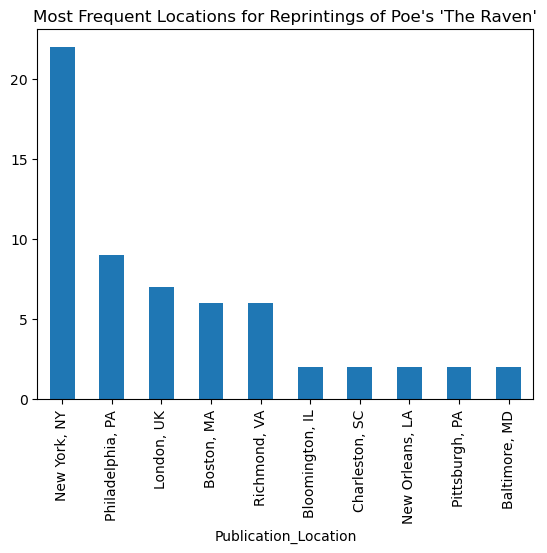

In [107]:
raven_reprintings_df['Publication_Location'].value_counts()[:10].plot(kind='bar', title="Most Frequent Locations for Reprintings of Poe's 'The Raven'") 

Above, we used the `.plot()` function, and we used the parameter `kind=` to specify a bar chart. If we wanted to make it easier to read, we could flip the orientation to a horizontal chart:

<Axes: title={'center': "Most Frequent Locations for Reprintings of Poe's 'The Raven'"}, ylabel='Publication_Location'>

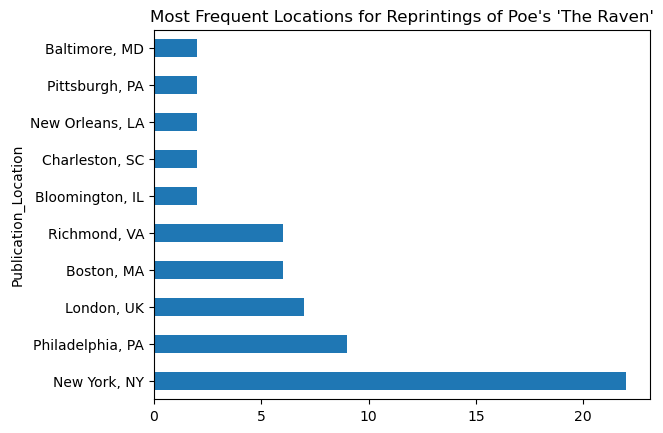

In [109]:
raven_reprintings_df['Publication_Location'].value_counts()[:10].plot(kind='barh', title="Most Frequent Locations for Reprintings of Poe's 'The Raven'") 

Or we could make it a pie chart:

<Axes: title={'center': "Most Frequent Locations for Reprintings of Poe's 'The Raven'"}, ylabel='count'>

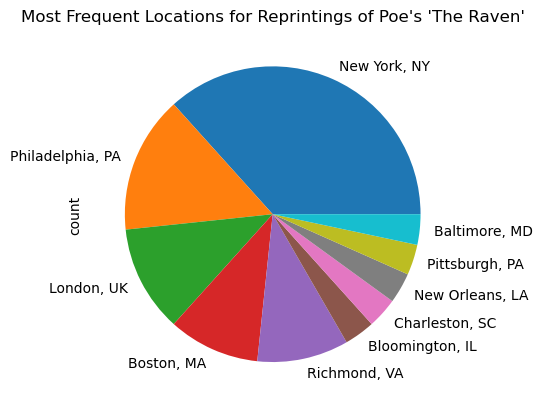

In [113]:
raven_reprintings_df['Publication_Location'].value_counts()[:10].plot(kind='pie', title="Most Frequent Locations for Reprintings of Poe's 'The Raven'") 

### Plotting data on a timeline
Remember the data we produced with `grouby()`? We can plot that as a timeline using the .plot() funciton. Note that here we don't have to specifiy the datatype because we are working with just counts of particular dates, so Python will default to dates on the X axis.

<Axes: title={'center': "Reprints of 'The Raven' by Year"}, xlabel='Year'>

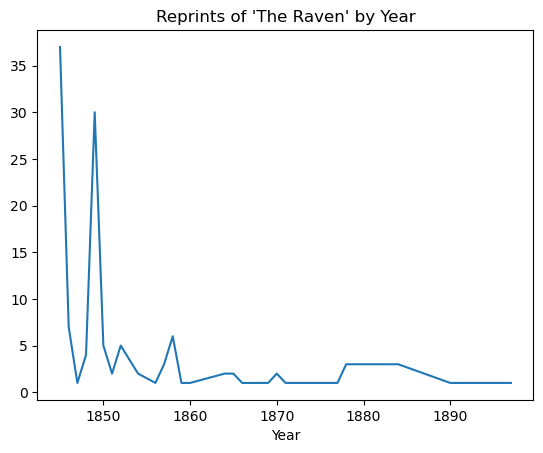

In [116]:
raven_reprintings_df.groupby('Year')['Publication_Title'].count().plot(title="Reprints of 'The Raven' by Year")


### What about all those ***blank spots*** that show up as NaN??

Plotting functions in Python will ignore blank values. So all of those blank columns are ignored.

We can try and make these blank spots a little more descriptive, much like we did for our simpler lists! 


### `.isna()` , `.notna()`, and `.fillna()`
For dataframes, there are ways of sorting through missing data. These operations are called `.isna()` `.notna()` and `.fillna()`, which allow us to check if a value is NaN (or not), and to fill in blank values in a dataframe or in a section of a dataframe (like a column).

In [119]:
# Create a new column caled `Links_updated` that fills in all the blank spots in our `Links` column with 
# "no link recorded"
raven_reprintings_df['Links_updated'] = raven_reprintings_df['Links'].fillna('no link recorded')

In [123]:
raven_reprintings_df.head(3)

,Work_ID,Date,Date_Uncertainty_Level,Publication_Title,Notes,Source,Type,Publication_Location,Links,lat,lon,Coordinates,Year,Links_updated
0,The Raven,1845-01-29,exact date,Evening Mirror,[Poe was still employed by the Mirror as a kin...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845,no link recorded
1,The Raven,1845-02-01,exact date,American Review,The American Review was printed under the titl...,https://www.eapoe.org/works/info/pp073.htm,Magazine,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845,no link recorded
2,The Raven,1845-02-03,exact date,New York Morning News,Â (Apparently reprinted from the Evening Mirr...,https://www.eapoe.org/works/info/pp073.htm,Newspaper,"New York, NY",NaN,40.712728,-74.006015,"40.7127281, -74.0060152",1845,no link recorded


## Exercise 2: Working with your own dataset

Let's try some of what we've learned on a dataset of your choosing! In pairs, use the space below to load and examine your own dataset.

With your group, you might try following:

+ Load and display your dataset
+ Try to count the values in a particular column
+ Look at the descriptive statistics for a particular column
+ Create a filter to look at just a subset of your data 
+ Make a simple visualization




In [159]:
import pandas as pd

### Group 1: The Early Novels Database (1660-1830)
This dataset includes a collection of metadata for over 2,000 novels published between 1660 and 1850 created as a part of the [Early Novels Database (END)](https://earlynovels.github.io/). Dataset source: [https://github.com/earlynovels/end-dataset](https://github.com/earlynovels/end-dataset) specifically this [full version from 2018](https://github.com/earlynovels/end-dataset/blob/master/end-dataset-master-11282018/11282018-full.tsv)

In [50]:
early_novels_database_df = pd.read_csv('../_datasets/early-novels-database-full.tsv', delimiter='\t')

In [ ]:
early_novels_database_df

In [ ]:
# Your code here

### Group 2: *The New York Times* Hardcover Besteller Dataset
This datasets includes [*NYT* Hardcover Fiction Bestsellers](https://data.post45.org/nyt-fiction-bestsellers-data/). Data Source: [https://view.data.post45.org/nytfull](https://view.data.post45.org/nytfull)

In [41]:
nyt_hardcover_bestsellers_df = pd.read_csv('../_datasets/nyt_hardcover_fiction_bestsellers_list.tsv', delimiter='\t')

In [ ]:
nyt_hardcover_bestsellers_df

In [ ]:
# Your code here

### Group 3: *Publisher's Weekly* Database of Translations into English, 2008-2024
This dataset from *Publisher's Weekly* includes works translated into English. Data source here: [https://www.publishersweekly.com/pw/translation/search/index.html](https://www.publishersweekly.com/pw/translation/search/index.html)
TSV file produced by checking all the year boxes (2008-2024) and searching with a blank search box (to retrieve all entries), and then copying the text as a TSV).

In [44]:
publishers_weekly_translation_df = pd.read_csv('../_datasets/publishers-weekly-translations-dataset.tsv', delimiter='\t')

In [ ]:
publishers_weekly_translation_df

In [ ]:
# Your code here

### Group 4: The Top 500 Novels Held in OCLC Libraries
This dataset consists of the ["Top 500 “Greatest” Novels (1021-2015)"](https://www.responsible-datasets-in-context.com/posts/top-500-novels/top-500-novels.html) -- in this case, the 500 novels most widely held in OCLC member libraries across the globe. 
Data source: [https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/top-500-novels/library_top_500.csv](https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/top-500-novels/library_top_500.csv)

In [56]:
top_500_novels_in_libraries_df = pd.read_csv('../_datasets/library_top_500_novels.csv')

In [ ]:
top_500_novels_in_libraries_df 

In [ ]:
# Your code here

### Group 5: Major U.S. Literary Prize Winners and Judges Dataset
This dataset consists of a list of all the major [U.S. literary prize winners, judges, and prize money](https://data.post45.org/the-index-of-major-literary-prizes-in-the-us/). Data source: [https://raw.githubusercontent.com/Post45-Data-Collective/data/main/major_literary_prizes/major_literary_prizes-winners_judges.tsv](https://raw.githubusercontent.com/Post45-Data-Collective/data/main/major_literary_prizes/major_literary_prizes-winners_judges.tsv)

In [59]:
major_literary_prizes_df = pd.read_csv('../_datasets/Major_Literary_Prize_Winners_and_Judges.csv')

In [ ]:
major_literary_prizes_df

In [ ]:
# Your code here

### Group 6: 50 Years of Billboard Year-End Hot 100 Music
This dataset includes the [top 100 songs on Billboard's Year-End Hot 100 music list](https://github.com/walkerkq/musiclyrics?tab=readme-ov-file#50-years-of-pop-music-lyrics). Data source: [https://github.com/walkerkq/musiclyrics/blob/master/billboard_lyrics_1964-2015.csv](https://github.com/walkerkq/musiclyrics/blob/master/billboard_lyrics_1964-2015.csv)

In [48]:
billboard_100_music_df = pd.read_csv('../_datasets/music/billboard_lyrics_1964-2015.csv', encoding='ISO-8859-1')

In [ ]:
billboard_100_music_df

In [ ]:
# Your code here

### Group 7: Shakespeare & Company: borrowing records of an English lending-library in Paris in the 1920s-1940s
This dataset consists of the "events" ––borrows, subscriptions, renewals, gifts––in the lending library logs of the Parisian [Shakespeare & Company English language library in the 1920s-1940s](https://shakespeareandco.princeton.edu/). For more about the data, see [here](https://shakespeareandco.princeton.edu/about/data/)
Data Source: [https://doi.org/10.34770/nz90-ym25](https://doi.org/10.34770/nz90-ym25)

In [57]:
Paris_lending_library_records_df = pd.read_csv('../_datasets/Shakespeare-and-Company-Circulation-Dataset/SCoData_events_v1_2020-07.csv')

In [ ]:
Paris_lending_library_records_df

In [ ]:
# Your code here

### If you want to try a different dataset...

In [38]:
name_of_your_dataframe = pd.read_csv('../_datasets/')

1. In the cell below, rename the variable `name_of_your_dataframe`. 
2. Then, place your cursor at the end of the file path `"../_datasets/"` and hit the `tab` button. You should see a list of files––I've uploaded versions of some datasets that you all had the option to work on. 
3. Choose your dataset. Make sure that you choose a file ending in `.csv` or `.tsv`. (Not all the files in the "_datasets" directory are CSV files). IF you select a .tsv file, make sure to specify delimiter='\t')

> ***Note***: Some of you might not see your dataset here, or see a CSV version of your data––this may be because your dataset from you biography is not. If you do want to work with XML data, there are things we can do to create a dataframe from this, but we need to do a little more work. If you're up for a bit of a challenge, read through the https://pypi.org/project/pandas-read-xml/. 

### Exercise 2a:

Once you've loaded your dataset, use one of the methods we've learned to sort or select a subset of your data:

In [ ]:
 # Your code here

### Exercise 2b:
Now, try and make a simiple data visualization using your dataset.

In [ ]:
# Your code here 